In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#Remove the warning
import warnings 
warnings.filterwarnings("ignore")


In [33]:
!pip install optuna

# Classification using Random Forest

In [34]:
#load the data  set
df=sns.load_dataset("tips")
#Print the last five lines

df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# EDA

In [35]:
df1=df['total_bill']
mean=df1.mean()
median=df1.median()
mode=df1.mode()

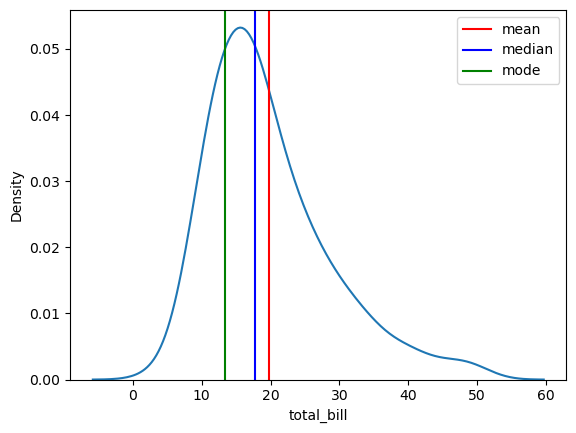

In [36]:
sns.distplot(df1,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

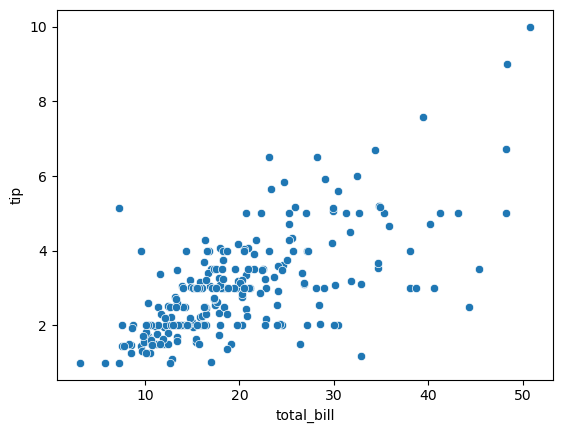

In [37]:
ax=sns.scatterplot(df,x="total_bill",y="tip")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("total_bill")
    plt.ylabel("tip")
plt.show()


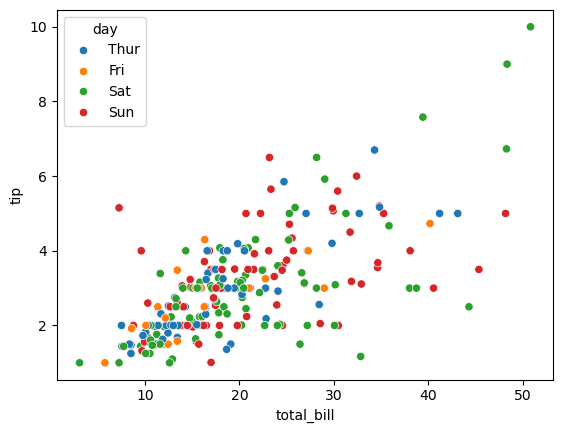

In [38]:
ax=sns.scatterplot(df,x="total_bill",y="tip",hue="day")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("total_bill")
    plt.ylabel("tip")
plt.show()


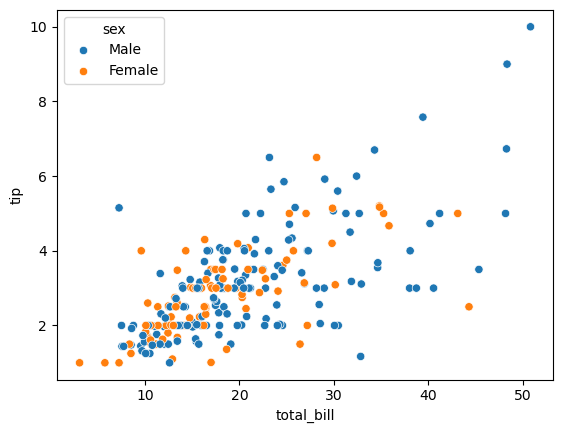

In [39]:
ax=sns.scatterplot(df,x="total_bill",y="tip",hue="sex")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("total_bill")
    plt.ylabel("tip")
plt.show()


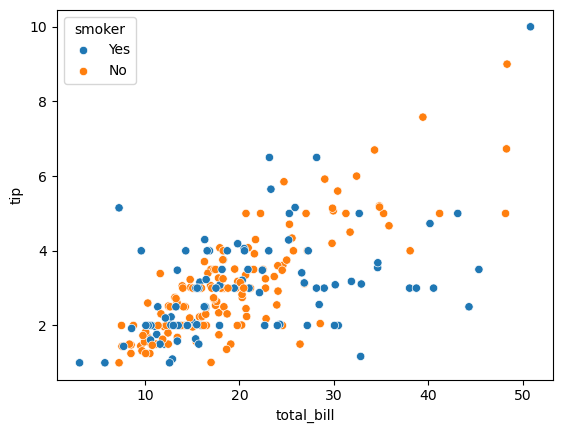

In [40]:
ax=sns.scatterplot(df,x="total_bill",y="tip",hue="smoker")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("total_bill")
    plt.ylabel("tip")
plt.show()


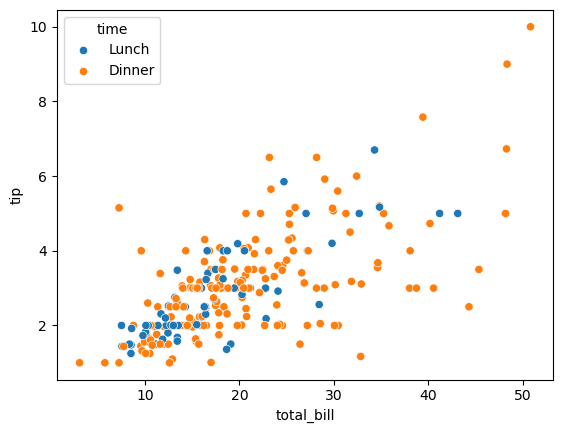

In [41]:
ax=sns.scatterplot(df,x="total_bill",y="tip",hue="time")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("total_bill")
    plt.ylabel("tip")
plt.show()


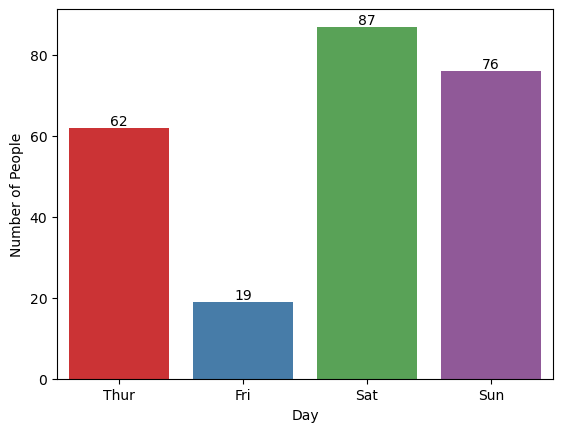

In [42]:
ax=sns.countplot(df,x=df["day"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Day")
    plt.ylabel("Number of People")
plt.show()


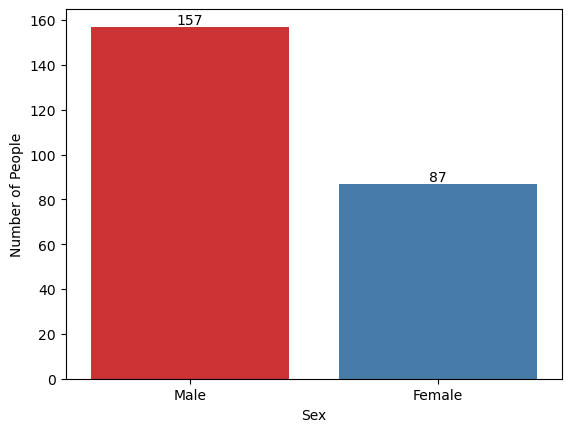

In [43]:
ax=sns.countplot(df,x=df["sex"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Sex")
    plt.ylabel("Number of People")
plt.show()

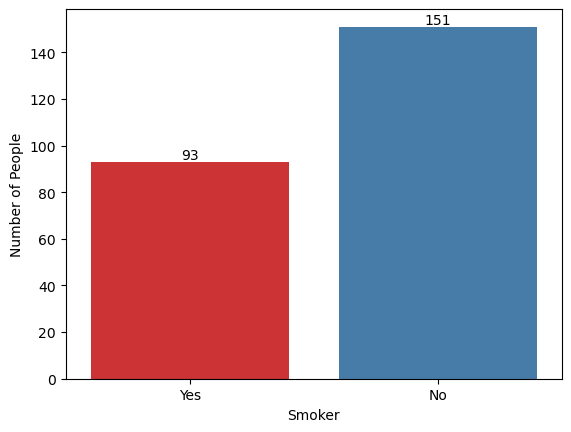

In [44]:
ax=sns.countplot(df,x=df["smoker"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Smoker")
    plt.ylabel("Number of People")
plt.show()

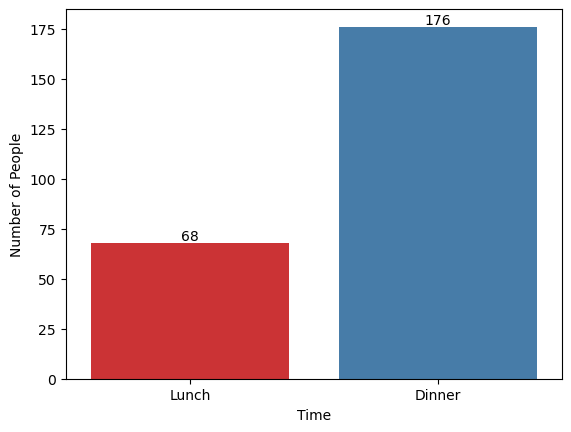

In [45]:
ax=sns.countplot(df,x=df["time"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Time")
    plt.ylabel("Number of People")
plt.show()

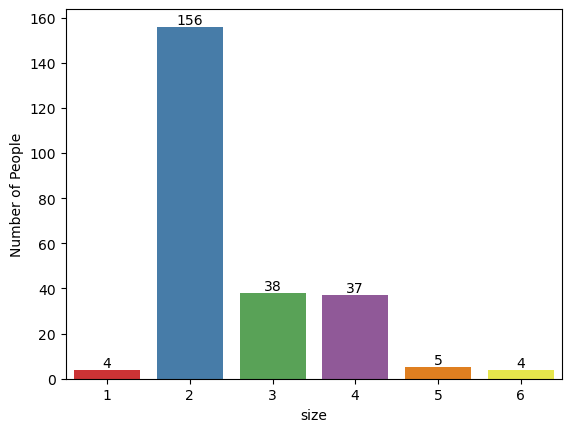

In [46]:
ax=sns.countplot(df,x=df["size"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("size")
    plt.ylabel("Number of People")
plt.show()

# Data Preprocessing

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [48]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [49]:
df=df.drop_duplicates()

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,243.0,19.813868,8.910071,3.07,13.38,17.81,24.175,50.81
tip,243.0,3.002387,1.385002,1.00,2.00,2.92,3.575,10.00
size,243.0,2.572016,0.952356,1.00,2.00,2.00,3.000,6.00


In [51]:
df1=df.copy()

In [52]:

#Aplly the label encodel for classificatioin
lb=LabelEncoder()
for i in df1.columns:
    if df1[i].dtype=="object" or df1[i].dtype=='category':
        df1[i]=lb.fit_transform(df1[i])

df1.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3


In [53]:
df1.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.674998,0.141350,0.090136,-0.039472,-0.179232,0.597589
tip,0.674998,1.000000,0.085274,0.009763,-0.007537,-0.117596,0.488400
sex,0.141350,0.085274,1.000000,0.009930,-0.071308,-0.198129,0.083248
smoker,0.090136,0.009763,0.009930,1.000000,-0.291941,-0.063911,-0.130564
day,-0.039472,-0.007537,-0.071308,-0.291941,1.000000,0.634812,0.073204
time,-0.179232,-0.117596,-0.198129,-0.063911,0.634812,1.000000,-0.100045
size,0.597589,0.488400,0.083248,-0.130564,0.073204,-0.100045,1.000000


# Apply model

In [54]:
df1.drop(columns=["day","time"],axis=1,inplace=True)

In [55]:
#Seprate the feature and target variable
X=df1.drop("sex",axis=1)
Y=df1["sex"]

#train test and split the data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


# Hyperparameter Tuning

In [58]:
%%time

from sklearn.model_selection import cross_val_score

#Define the object function
def object(trials):
    n_estimators =trials.suggest_int("n_estimators",10,100)
    max_depth = trials.suggest_int('max_depth',4,20)

    #Define the model
    model =RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )

    #Perform k-fold CV 
    score =cross_val_score(model,X_train,Y_train,cv=4,scoring='accuracy').mean()

    return score


CPU times: total: 0 ns
Wall time: 0 ns


In [59]:
%%time
import optuna
# Create a study object and optimize the objective function
study = optuna.create_study(direction ='maximize',sampler=optuna.samplers.TPESampler())

#Sampler suggest the next value based on the past data
study.optimize(object,n_trials=30)

[I 2026-02-20 14:41:33,420] A new study created in memory with name: no-name-9a7be604-9a9a-43cb-8f23-539b9cf537d5
[I 2026-02-20 14:41:33,781] Trial 0 finished with value: 0.5669642857142857 and parameters: {'n_estimators': 32, 'max_depth': 9}. Best is trial 0 with value: 0.5669642857142857.
[I 2026-02-20 14:41:34,908] Trial 1 finished with value: 0.5977891156462586 and parameters: {'n_estimators': 89, 'max_depth': 19}. Best is trial 1 with value: 0.5977891156462586.
[I 2026-02-20 14:41:35,890] Trial 2 finished with value: 0.5875850340136055 and parameters: {'n_estimators': 88, 'max_depth': 12}. Best is trial 1 with value: 0.5977891156462586.
[I 2026-02-20 14:41:36,600] Trial 3 finished with value: 0.5977891156462585 and parameters: {'n_estimators': 57, 'max_depth': 12}. Best is trial 1 with value: 0.5977891156462586.
[I 2026-02-20 14:41:37,186] Trial 4 finished with value: 0.5514455782312926 and parameters: {'n_estimators': 38, 'max_depth': 13}. Best is trial 1 with value: 0.5977891156

CPU times: total: 22.2 s
Wall time: 22.6 s


In [60]:

# Print the best result
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.5978954081632653
Best hyperparameters: {'n_estimators': 71, 'max_depth': 18}


In [62]:
from sklearn.metrics import accuracy_score
# Train a RandomForestClassifier using the best hyperparameters from Optuna
best_model = RandomForestClassifier(**study.best_trial.params, random_state=42)

# Fit the model to the training data
best_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(Y_test, y_pred)

# Print the test accuracy
print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')


Test Accuracy with best hyperparameters: 0.57


# Predication

In [66]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
#predication
best_model.predict([[24.59,3.61,0,4]])

#1 --> Male
#0 --> Female
#array([0]) show the female

array([0])